In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

In [ ]:
print('----------------------------------------Question a----------------------------------------')
# load data
tnctrain = pd.read_csv('titanic_strat_train.csv')
print(tnctrain.head())

----------------------------------------Question a----------------------------------------
   pclass  survived                                             name     sex  \
0       3         1                               Smyth, Miss. Julia  female   
1       3         1                         Glynn, Miss. Mary Agatha  female   
2       3         1  Whabee, Mrs. George Joseph (Shawneene Abi-Saab)  female   
3       3         0                                  Vovk, Mr. Janko    male   
4       3         0                        de Pelsmaeker, Mr. Alfons    male   

    age  sibsp  parch  ticket    fare cabin embarked boat  body  \
0   NaN      0      0  335432  7.7333   NaN        Q   13   NaN   
1   NaN      0      0  335677  7.7500   NaN        Q   13   NaN   
2  38.0      0      0    2688  7.2292   NaN        C    C   NaN   
3  22.0      0      0  349252  7.8958   NaN        S  NaN   NaN   
4  16.0      0      0  345778  9.5000   NaN        S  NaN   NaN   

                         

In [ ]:
print(tnctrain.describe())

           pclass    survived         age       sibsp       parch        fare  \
count  981.000000  981.000000  782.000000  981.000000  981.000000  980.000000   
mean     2.299694    0.382263   29.963448    0.480122    0.386340   32.542708   
std      0.836593    0.486188   14.482025    0.989157    0.873987   49.325229   
min      1.000000    0.000000    0.333300    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   21.000000    0.000000    0.000000    7.895800   
50%      3.000000    0.000000   28.000000    0.000000    0.000000   14.054150   
75%      3.000000    1.000000   39.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    9.000000  512.329200   

             body  
count   83.000000  
mean   168.602410  
std     94.252119  
min     14.000000  
25%     85.000000  
50%    169.000000  
75%    258.500000  
max    328.000000  


In [ ]:
print(tnctrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     981 non-null    int64  
 1   survived   981 non-null    int64  
 2   name       981 non-null    object 
 3   sex        981 non-null    object 
 4   age        782 non-null    float64
 5   sibsp      981 non-null    int64  
 6   parch      981 non-null    int64  
 7   ticket     981 non-null    object 
 8   fare       980 non-null    float64
 9   cabin      212 non-null    object 
 10  embarked   981 non-null    object 
 11  boat       366 non-null    object 
 12  body       83 non-null     float64
 13  home.dest  567 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 107.4+ KB
None


sex
female    72.173913
male      19.811321
Name: survived, dtype: float64
embarked
C    57.50000
Q    34.00000
S    33.18649
Name: survived, dtype: float64


<ipython-input-135-c7ba3fb3b80c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival_rate.index, y=gender_survival_rate.values, palette='viridis')


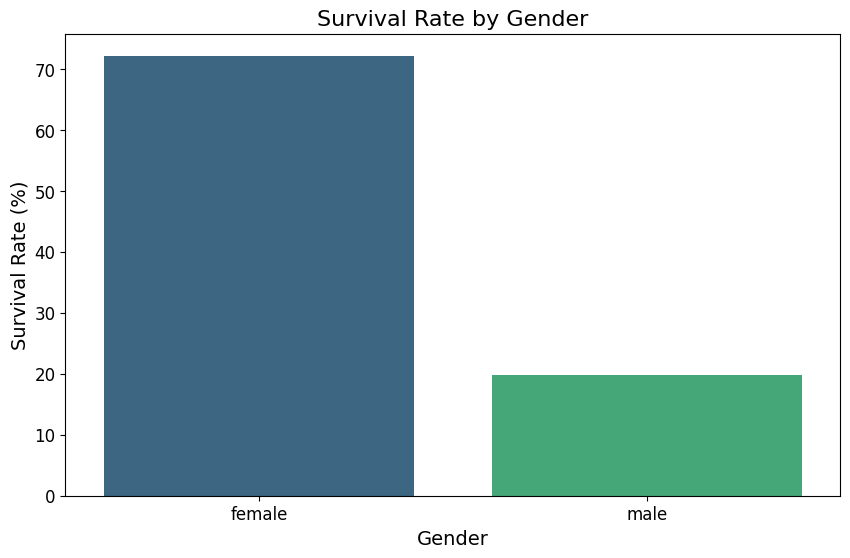

<ipython-input-135-c7ba3fb3b80c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_survival_rate.index, y=embarked_survival_rate.values, palette='viridis')


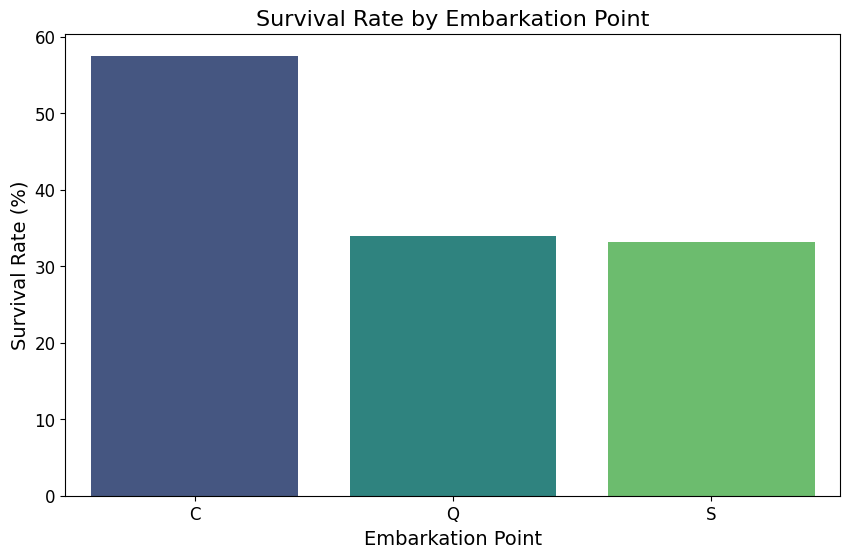

In [ ]:
# create gender and embarked survival rate cols
gender_survival_rate = tnctrain.groupby('sex')['survived'].mean() * 100
print(gender_survival_rate)

embarked_survival_rate = tnctrain.groupby('embarked')['survived'].mean() * 100
print(embarked_survival_rate)

# plot a) gender
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_survival_rate.index, y=gender_survival_rate.values, palette='viridis')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)
plt.title('Survival Rate by Gender', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Splot b) embark
plt.figure(figsize=(10, 6))
sns.barplot(x=embarked_survival_rate.index, y=embarked_survival_rate.values, palette='viridis')
plt.xlabel('Embarkation Point', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)
plt.title('Survival Rate by Embarkation Point', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# fix any potnetial incorrect dtypes
def fix_dtypes(df):
    '''
    A function to change dtypes of variables to desired dtypes
    Input : pandas dataframe
    Output : pandas dataframe
    '''
    dtype_mapping = {
        'pclass': 'category',
        'name': 'object',
        'sex': 'category',
        'age': 'float64',
        'sibsp': 'int64',
        'parch': 'int64',
        'fare': 'float64',
        'body': 'float64',
        'ticket': 'object',
        'cabin': 'object',
        'embarked': 'category',
        'boat': 'object',
        'home.dest': 'object'
    }
    df = df.astype(dtype_mapping)
    return df

# apply mapping
tnctrain = fix_dtypes(tnctrain)

In [ ]:
tnctrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     981 non-null    category
 1   survived   981 non-null    int64   
 2   name       981 non-null    object  
 3   sex        981 non-null    category
 4   age        782 non-null    float64 
 5   sibsp      981 non-null    int64   
 6   parch      981 non-null    int64   
 7   ticket     981 non-null    object  
 8   fare       980 non-null    float64 
 9   cabin      212 non-null    object  
 10  embarked   981 non-null    category
 11  boat       366 non-null    object  
 12  body       83 non-null     float64 
 13  home.dest  567 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 87.7+ KB


In [ ]:
print('----------------------------------------Question b----------------------------------------')
# feature engineering
def feature_engineering(df):
    '''
    A fcuntion to create and remove varibales before applyting any ml model
    1 - fill any missing values
    2 - Create 3 new varibales: family_size, title, fare_per_person
    3 - Remove any unwanted colums
    Input : A pandas dataframe
    Output : A pandas dataframe
    '''
    df['age'].fillna(tnctrain['age'].median(), inplace=True)
    df['fare'].fillna(tnctrain['fare'].median(), inplace=True)
    df['family_size'] = df['sibsp'] + df['parch'] + 1
    df['title'] = df['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    df['fare_per_person'] = df['fare'] / df['family_size']
    columns_to_drop = ['cabin', 'body', 'boat', 'home.dest', 'name', 'ticket']
    df['title'] = df['title'].astype('category')
    df.drop(columns=columns_to_drop, inplace=True)
    return df

----------------------------------------Question b----------------------------------------


In [ ]:
print(tnctrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     981 non-null    category
 1   survived   981 non-null    int64   
 2   name       981 non-null    object  
 3   sex        981 non-null    category
 4   age        782 non-null    float64 
 5   sibsp      981 non-null    int64   
 6   parch      981 non-null    int64   
 7   ticket     981 non-null    object  
 8   fare       980 non-null    float64 
 9   cabin      212 non-null    object  
 10  embarked   981 non-null    category
 11  boat       366 non-null    object  
 12  body       83 non-null     float64 
 13  home.dest  567 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 87.7+ KB
None


In [ ]:
print('----------------------------------------Question c----------------------------------------')
def OHE_cat(df):
  # list the cat columns
  categorical_cols = ['pclass', 'sex', 'embarked', 'title']
  # Fit and transform the categorical columns
  encoder = OneHotEncoder(drop=None, sparse_output=False)
  encoded_array = encoder.fit_transform(df[categorical_cols])
  # Create a DataFrame with the encoded columns
  encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))
  # Drop the original categorical columns
  df = df.drop(columns=categorical_cols)
  # Concatenate the original DataFrame with the encoded columns
  df = pd.concat([df, encoded_df], axis=1)
  return df

----------------------------------------Question c----------------------------------------


In [ ]:
# define X and y
X = tnctrain.drop(columns=['survived'])
y = tnctrain['survived'].astype(int)

In [ ]:
# define the feature engineering and one-hot encoding steps in a pipeline
categorical_cols = ['pclass', 'sex', 'embarked', 'title']
numerical_cols = ['age', 'sibsp', 'parch', 'fare', 'family_size', 'fare_per_person']

# Preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that includes feature engineering and the preprocessor
pipeline = Pipeline(steps=[
    ('fix_dtypes', FunctionTransformer(fix_dtypes, validate=False)),
    ('feature_engineering', FunctionTransformer(feature_engineering, validate=False)),
    ('preprocessor', preprocessor)
])


# Apply the pipeline to the entire training data
X_transformed = pipeline.fit_transform(X)

# Get the feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(feature_names)

# Convert the transformed data back to a DataFrame
X_df = pd.DataFrame(X_transformed, columns=all_feature_names)

In [ ]:
print(X_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 981 non-null    float64
 1   sibsp               981 non-null    float64
 2   parch               981 non-null    float64
 3   fare                981 non-null    float64
 4   family_size         981 non-null    float64
 5   fare_per_person     981 non-null    float64
 6   pclass_1            981 non-null    float64
 7   pclass_2            981 non-null    float64
 8   pclass_3            981 non-null    float64
 9   sex_female          981 non-null    float64
 10  sex_male            981 non-null    float64
 11  embarked_C          981 non-null    float64
 12  embarked_Q          981 non-null    float64
 13  embarked_S          981 non-null    float64
 14  title_Capt          981 non-null    float64
 15  title_Col           981 non-null    float64
 16  title_Do

In [ ]:
print('----------------------------------------Question d----------------------------------------')
# split data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# traning the model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# predict
y_pred = dtc.predict(X_test)

# copmute the metrics
def evaluate_model(y_true, y_pred):
    '''
    A function that calculates confusion matrix, accuracy, precision and recall
    Input :
    The correct labels - y_true
    The predictions - y_pred
    '''
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    return cm, accuracy, precision, recall

print("Model Evaluation (without cross-validation):")
evaluate_model(y_test, y_pred)

----------------------------------------Question d----------------------------------------
Model Evaluation (without cross-validation):
Confusion Matrix:
[[89 25]
 [23 60]]
Accuracy: 0.7563451776649747
Precision: 0.7058823529411765
Recall: 0.7228915662650602


(array([[89, 25],
        [23, 60]]),
 0.7563451776649747,
 0.7058823529411765,
 0.7228915662650602)

In [ ]:
dtc_cv = DecisionTreeClassifier(random_state=42)
def display_scores(scores):
    '''
    A function that prints metrics to evalue models
    '''
    print ("Scores:", scores)
    print ("Mean:", scores.mean())
    print ("Standard deviation:", scores.std())

# Perform cross-validation and get predictions
scores = cross_val_score(dtc_cv, X_train, y_train, cv=3, scoring='accuracy')
display_scores(scores)


# cv scores
y_pred_cv = cross_val_predict(dtc_cv, X_train, y_train, cv=3)

# evalualte
print("\nModel Evaluation (with cross-validation):")
print(evaluate_model(y_train, y_pred_cv))

Scores: [0.69083969 0.70881226 0.72796935]
Mean: 0.7092071012839636
Standard deviation: 0.015160688770601841

Model Evaluation (with cross-validation):
Confusion Matrix:
[[388 104]
 [124 168]]
Accuracy: 0.7091836734693877
Precision: 0.6176470588235294
Recall: 0.5753424657534246
(array([[388, 104],
       [124, 168]]), 0.7091836734693877, 0.6176470588235294, 0.5753424657534246)


In [ ]:
print('----------------------------------------Question d----------------------------------------')
# train with max depth = 5
dtc_m5 = DecisionTreeClassifier(random_state=42, max_depth=5)
dtc_m5.fit(X_train, y_train)
# make pred
y_pred_m5 = dtc_m5.predict(X_test)
# find metrics using func
cm_m5, accuracy_m5, precision_m5, recall_m5 = evaluate_model(y_test, y_pred_m5)

----------------------------------------Question d----------------------------------------
Confusion Matrix:
[[98 16]
 [18 65]]
Accuracy: 0.8274111675126904
Precision: 0.8024691358024691
Recall: 0.7831325301204819


In [ ]:
print('----------------------------------------Question e----------------------------------------')
# Define the parameter grid
param_grid = {
    'max_depth': [5, 8, 9, 10, 11, 12, 15, None],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 5, 8, 10]
}

# Initialize the GridSearchCV object
grid_search_DTC = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_DTC.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search_DTC.best_params_
best_estimator = grid_search_DTC.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Evaluate the best estimator on the test set
y_pred_best = best_estimator.predict(X_test)

print("\nModel Evaluation (Best Estimator):")
cm_best, accuracy_best, precision_best, recall_best = evaluate_model(y_test, y_pred_best)


----------------------------------------Question e----------------------------------------
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, random_state=42)

Model Evaluation (Best Estimator):
Confusion Matrix:
[[103  11]
 [ 22  61]]
Accuracy: 0.8324873096446701
Precision: 0.8472222222222222
Recall: 0.7349397590361446


In [ ]:
print('----------------------------------------Question f----------------------------------------')
# initial Model
y_pred = dtc.predict(X_test)
y_pred_prob = dtc.predict_proba(X_test)[:, 1]

----------------------------------------Question f----------------------------------------


In [ ]:
# Model with max_depth=5
y_pred_m5 = dtc_m5.predict(X_test)
y_pred_prob_m5 = dtc_m5.predict_proba(X_test)[:, 1]

In [ ]:
# GS model
y_pred_best = best_estimator.predict(X_test)
y_pred_prob_best = best_estimator.predict_proba(X_test)[:, 1]

In [ ]:
# Find ROC
# initial model
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# max depth =5 model
fpr_m5, tpr_m5, _ = roc_curve(y_test, y_pred_prob_m5)
roc_auc_m5 = auc(fpr_m5, tpr_m5)

# GSCV model
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

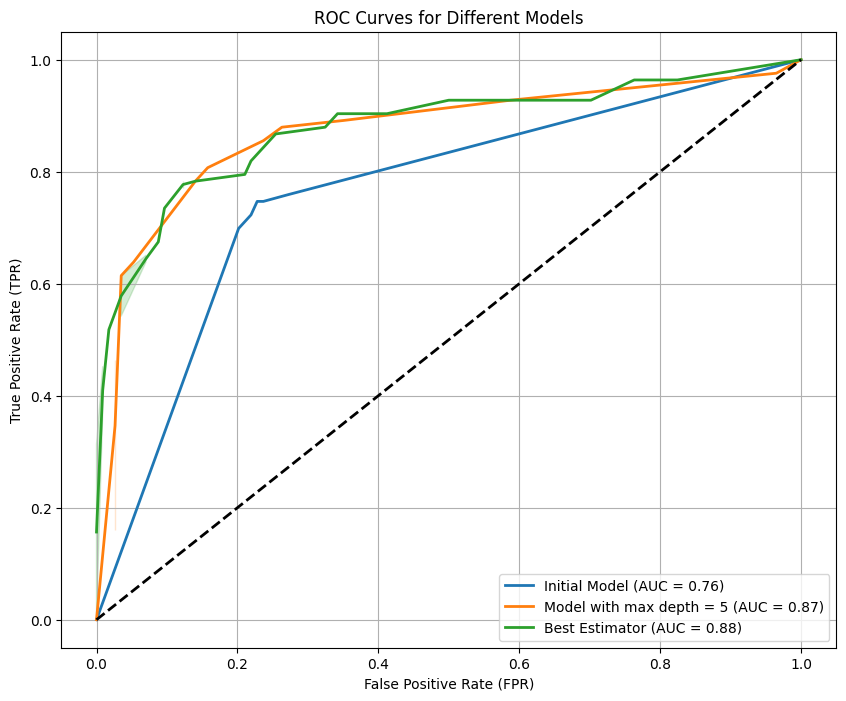

AUC for Initial Model: 0.76
AUC for Model with max depth = 5: 0.87
AUC for Best Estimator: 0.88


In [ ]:
# Plotting the ROC curves
plt.figure(figsize=(10, 8))
sns.lineplot(x=fpr, y=tpr, label=f'Initial Model (AUC = {roc_auc:.2f})', linewidth=2)
sns.lineplot(x=fpr_m5, y=tpr_m5, label=f'Model with max depth = 5 (AUC = {roc_auc_m5:.2f})', linewidth=2)
sns.lineplot(x=fpr_best, y=tpr_best, label=f'Best Estimator (AUC = {roc_auc_best:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Adding legend and axis labels
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.grid(True)
plt.show()

# Print AUC scores
print(f'AUC for Initial Model: {roc_auc:.2f}')
print(f'AUC for Model with max depth = 5: {roc_auc_m5:.2f}')
print(f'AUC for Best Estimator: {roc_auc_best:.2f}')

In [ ]:
print('----------------------------------------Question g----------------------------------------')
tnctest = pd.read_csv('titanic_strat_test.csv')
print(tnctest.head())

----------------------------------------Question g----------------------------------------
   pclass  survived                         name     sex   age  sibsp  parch  \
0       3         0          Sage, Mr. Frederick    male   NaN      8      2   
1       1         1   Snyder, Mr. John Pillsbury    male  24.0      1      0   
2       2         0              Ashby, Mr. John    male  57.0      0      0   
3       3         0  Rosblom, Mr. Viktor Richard    male  18.0      1      1   
4       2         1          Doling, Miss. Elsie  female  18.0      0      1   

     ticket     fare cabin embarked boat  body         home.dest  
0  CA. 2343  69.5500   NaN        S  NaN   NaN               NaN  
1     21228  82.2667   B45        S    7   NaN   Minneapolis, MN  
2    244346  13.0000   NaN        S  NaN   NaN  West Hoboken, NJ  
3    370129  20.2125   NaN        S  NaN   NaN               NaN  
4    231919  23.0000   NaN        S  NaN   NaN       Southampton  


In [ ]:
# use pipeline to clean and transform test
# define X and y
X_tnc_test = tnctest.drop(columns=['survived'])
y_tnc_test = tnctest['survived'].astype(int)
# Apply the pipeline to the entire training data
X_transformed = pipeline.transform(X_tnc_test)

# Get the feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(feature_names)

# Convert the transformed data back to a DataFrame
X_tnc_df = pd.DataFrame(X_transformed, columns=all_feature_names)

In [ ]:
X_tnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 328 non-null    float64
 1   sibsp               328 non-null    float64
 2   parch               328 non-null    float64
 3   fare                328 non-null    float64
 4   family_size         328 non-null    float64
 5   fare_per_person     328 non-null    float64
 6   pclass_1            328 non-null    float64
 7   pclass_2            328 non-null    float64
 8   pclass_3            328 non-null    float64
 9   sex_female          328 non-null    float64
 10  sex_male            328 non-null    float64
 11  embarked_C          328 non-null    float64
 12  embarked_Q          328 non-null    float64
 13  embarked_S          328 non-null    float64
 14  title_Capt          328 non-null    float64
 15  title_Col           328 non-null    float64
 16  title_Do

In [ ]:
# test models on test set
y_pred_best_new = best_estimator.predict(X_tnc_df)
print("\nModel Evaluation (Best Estimator on new test set):")
cm_best_new, accuracy_best_new, precision_best_new, recall_best_new = evaluate_model(y_tnc_test, y_pred_best_new)

# test on initial model
y_pred_initial_new = dtc.predict(X_tnc_df)
print("\nModel Evaluation (Initial Model on new test set):")
cm_initial_new, accuracy_initial_new, precision_initial_new, recall_initial_new = evaluate_model(y_tnc_test, y_pred_initial_new)

# compare
print("\nComparison of both models:")
print("Best Estimator:")
print(f"Confusion Matrix:\n{cm_best_new}")
print(f"Accuracy: {accuracy_best_new}")
print(f"Precision: {precision_best_new}")
print(f"Recall: {recall_best_new}")

print("\nInitial Model:")
print(f"Confusion Matrix:\n{cm_initial_new}")
print(f"Accuracy: {accuracy_initial_new}")
print(f"Precision: {precision_initial_new}")
print(f"Recall: {recall_initial_new}")


Model Evaluation (Best Estimator on new test set):
Confusion Matrix:
[[182  21]
 [ 43  82]]
Accuracy: 0.8048780487804879
Precision: 0.7961165048543689
Recall: 0.656

Model Evaluation (Initial Model on new test set):
Confusion Matrix:
[[146  57]
 [ 42  83]]
Accuracy: 0.698170731707317
Precision: 0.5928571428571429
Recall: 0.664

Comparison of both models:
Best Estimator:
Confusion Matrix:
[[182  21]
 [ 43  82]]
Accuracy: 0.8048780487804879
Precision: 0.7961165048543689
Recall: 0.656

Initial Model:
Confusion Matrix:
[[146  57]
 [ 42  83]]
Accuracy: 0.698170731707317
Precision: 0.5928571428571429
Recall: 0.664


In [ ]:
print('----------------------------------------Question h----------------------------------------')
print('i')
# Fit the best estimator on the training data
best_estimator.fit(X_df, y)

# Determine feature importances
importances = best_estimator.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importances:")
print(feature_importance_df)

# Removing features related to 'embarked' and 'parch'
columns_to_remove = [col for col in all_feature_names if 'embarked' in col or col == 'parch']
X_df_reduced = X_df.drop(columns=columns_to_remove)
X_tnc_df_reduced = X_tnc_df.drop(columns=columns_to_remove)

# Retrain the model without the least important features
best_estimator_reduced = DecisionTreeClassifier(**best_params, random_state=42)
best_estimator_reduced.fit(X_df_reduced, y)

# Evaluate the reduced model on the training data
y_pred_best_reduced_train = best_estimator_reduced.predict(X_df_reduced)
print("\nModel Evaluation (Best Estimator without 'embarked' and 'parch' on training set):")
evaluate_model(y, y_pred_best_reduced_train)

# Evaluate the reduced model on the test set
y_pred_best_reduced_test = best_estimator_reduced.predict(X_tnc_df_reduced)
print("\nModel Evaluation (Best Estimator without 'embarked' and 'parch' on test set):")
evaluate_model(y_tnc_test, y_pred_best_reduced_test)

In [ ]:
# Removing features with zero importance
columns_to_remove_zero_importance = feature_importance_df[feature_importance_df['Importance'] == 0]['Feature'].tolist()
X_df_reduced_zero_importance = X_df.drop(columns=columns_to_remove_zero_importance)
X_tnc_df_reduced_zero_importance = X_tnc_df.drop(columns=columns_to_remove_zero_importance)

# Retrain the model without the zero importance features
best_estimator_reduced_zero_importance = DecisionTreeClassifier(**best_params, random_state=42)
best_estimator_reduced_zero_importance.fit(X_df_reduced_zero_importance, y)

# Evaluate the reduced model on the training data
y_pred_best_reduced_train_zero_importance = best_estimator_reduced_zero_importance.predict(X_df_reduced_zero_importance)
print("\nModel Evaluation (Best Estimator without zero importance features on training set):")
evaluate_model(y, y_pred_best_reduced_train_zero_importance)

# Evaluate the reduced model on the test set
y_pred_best_reduced_test_zero_importance = best_estimator_reduced_zero_importance.predict(X_tnc_df_reduced_zero_importance)
print("\nModel Evaluation (Best Estimator without zero importance features on test set):")
evaluate_model(y_tnc_test, y_pred_best_reduced_test_zero_importance)


Model Evaluation (Best Estimator without zero importance features on training set):
Confusion Matrix:
[[556  50]
 [107 268]]
Accuracy: 0.8399592252803262
Precision: 0.8427672955974843
Recall: 0.7146666666666667

Model Evaluation (Best Estimator without zero importance features on test set):
Confusion Matrix:
[[179  24]
 [ 39  86]]
Accuracy: 0.8079268292682927
Precision: 0.7818181818181819
Recall: 0.688


(array([[179,  24],
        [ 39,  86]]),
 0.8079268292682927,
 0.7818181818181819,
 0.688)

In [ ]:
def treat_outliers(df):
    for col in ['age', 'fare']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        median = df[col].median()
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    return df

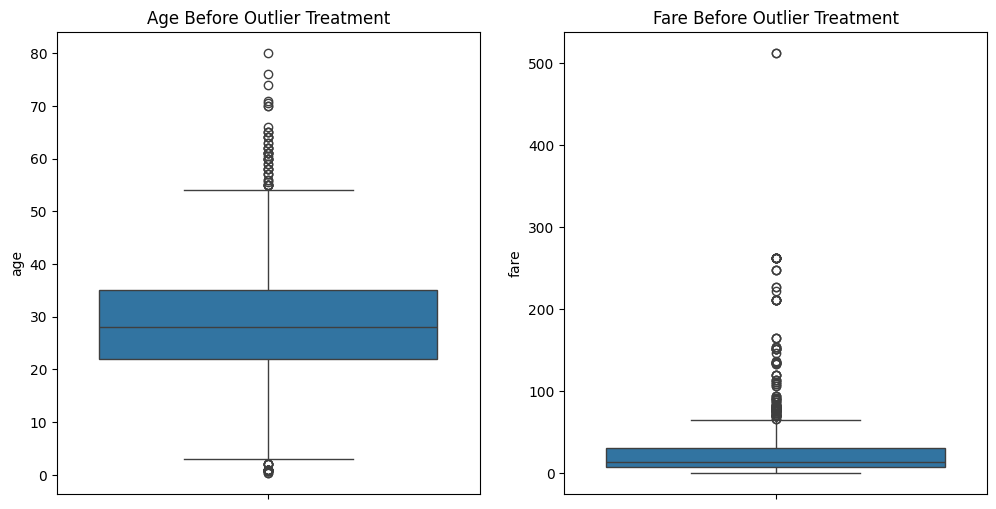

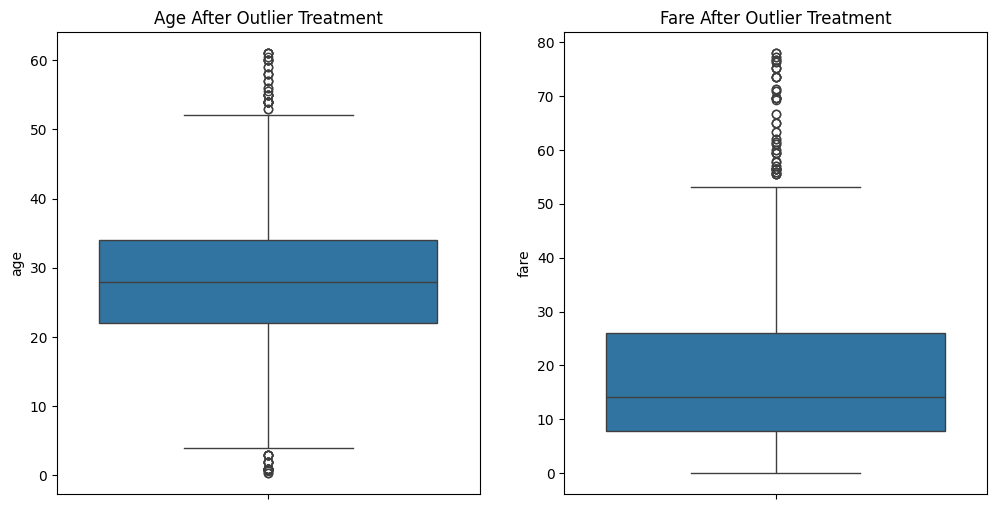

In [ ]:
# Plot boxplots before outlier treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=X_df_reduced_zero_importance['age'])
plt.title('Age Before Outlier Treatment')
plt.subplot(1, 2, 2)
sns.boxplot(y=X_df_reduced_zero_importance['fare'])
plt.title('Fare Before Outlier Treatment')
plt.show()

# Treat outliers in training and test datasets
X_df_reduced_zero_importance_treated = treat_outliers(X_df_reduced_zero_importance.copy())
X_tnc_df_reduced_zero_importance_treated = treat_outliers(X_tnc_df_reduced_zero_importance.copy())

# Plot boxplots after outlier treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=X_df_reduced_zero_importance_treated['age'])
plt.title('Age After Outlier Treatment')
plt.subplot(1, 2, 2)
sns.boxplot(y=X_df_reduced_zero_importance_treated['fare'])
plt.title('Fare After Outlier Treatment')
plt.show()


In [ ]:
# Retrain the model without the zero importance features and with treated outliers
best_estimator_reduced_zero_importance_treated = DecisionTreeClassifier(**best_params, random_state=42)
best_estimator_reduced_zero_importance_treated.fit(X_df_reduced_zero_importance_treated, y)

# Evaluate the reduced model on the training data
y_pred_best_reduced_train_zero_importance_treated = best_estimator_reduced_zero_importance_treated.predict(X_df_reduced_zero_importance_treated)
print("\nModel Evaluation (Best Estimator without zero importance features on training set after outlier treatment):")
evaluate_model(y, y_pred_best_reduced_train_zero_importance_treated)

# Evaluate the reduced model on the test set
y_pred_best_reduced_test_zero_importance_treated = best_estimator_reduced_zero_importance_treated.predict(X_tnc_df_reduced_zero_importance_treated)
print("\nModel Evaluation (Best Estimator without zero importance features on test set after outlier treatment):")
evaluate_model(y_tnc_test, y_pred_best_reduced_test_zero_importance_treated)



Model Evaluation (Best Estimator without zero importance features on training set after outlier treatment):
Confusion Matrix:
[[556  50]
 [106 269]]
Accuracy: 0.8409785932721713
Precision: 0.8432601880877743
Recall: 0.7173333333333334

Model Evaluation (Best Estimator without zero importance features on test set after outlier treatment):
Confusion Matrix:
[[180  23]
 [ 36  89]]
Accuracy: 0.8201219512195121
Precision: 0.7946428571428571
Recall: 0.712


(array([[180,  23],
        [ 36,  89]]),
 0.8201219512195121,
 0.7946428571428571,
 0.712)